## Data cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import feature_selection, metrics
from pandas.plotting import scatter_matrix
from seaborn import pairplot
from sklearn import feature_selection, metrics
from sklearn.preprocessing import StandardScaler

In [3]:
os.chdir('/content/drive/MyDrive/big_data_pred/cw/')

dbdata = pd.read_csv('diabetic_data.csv')

In [4]:
#shape of the daibetes dataframe 
dbdata.shape
#this implies that the data has 101,766 rows (observations) and 50 columns (attributes)

(101766, 50)

In [5]:
dbdata.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [6]:
dbdata.info()
#some of the columns which are meant to be categorical are numerical in the data
#hence we need to convert them to categorical 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
dbdata.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

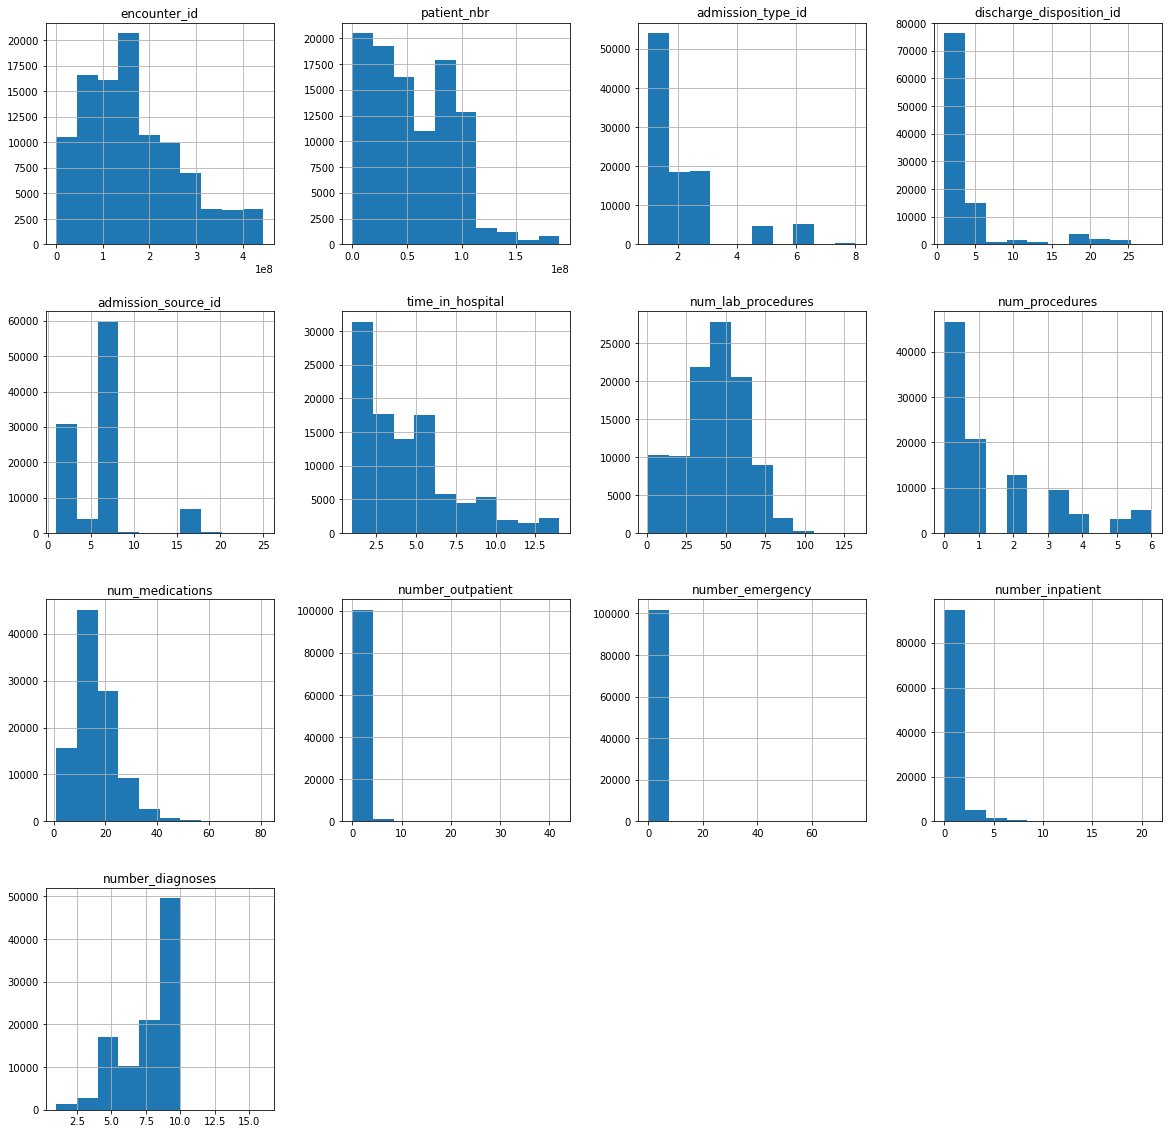

In [8]:
dbdata.hist(figsize = (20,20))
plt.show()

In [9]:
dbdata.isnull().sum()
#while there are several missing data in the dataframe, isnull() function shows that there is non. 
#this is becuase the null data are not represented by na or nan, but rather by space and ?
#to replace the null values with na so that we can track them i'll use the regex functions

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [10]:
dbdata = dbdata.replace('?', np.nan) # replace ? with nan
dbdata = dbdata.replace('^\s+', np.nan, regex=True) # replace empty spaces with nan
print(dbdata.isna().sum())
print(dbdata.shape[0])

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [11]:
#Drop column with more than 50% missing values 
dbdata.dropna(thresh=len(dbdata.index)/2, axis=1, inplace=True)
dbdata.shape

(101766, 49)

In [12]:
# def remove(df):
#   for x in df.columns: 
#     f = df[x].value_counts()/df.shape[0]
#     if f.to_frame().iloc[:, 0].max() > 0.95: 
#       df.drop(x, axis = 1, inplace = True)
   

# remove(dbdata)
# dbdata.shape

In [13]:
for x in dbdata.columns: 
    f = dbdata[x].value_counts()/dbdata.shape[0]
    if f.to_frame().iloc[:, 0].max() >= 0.95: 
      dbdata.drop(x, axis = 1, inplace = True)
print(dbdata.shape)

(101766, 33)


In [14]:
dbdata['age'].value_counts()


def age(df):
  for i in range(df.shape[0]):
    if(df.loc[i,'age']=='[70-80)'):
        df.loc[i,'age']=75
    elif(df.loc[i,'age']=='[60-70)'):
        df.loc[i,'age']=65
    elif(df.loc[i,'age']=='[50-60)'):
        df.loc[i,'age']=55
    elif(df.loc[i,'age']=='[80-90)'):
        df.loc[i,'age']=85
    elif(df.loc[i,'age']=='[40-50)'):
        df.loc[i,'age']=45
    elif(df.loc[i,'age']=='[30-40)'):
        df.loc[i,'age']=35
    elif(df.loc[i,'age']=='[90-100)'):
        df.loc[i,'age']=95
    elif(df.loc[i,'age']=='[20-30)'):
        df.loc[i,'age']=25
    elif(df.loc[i,'age']=='[10-20)'):
        df.loc[i,'age']=15
    elif(df.loc[i,'age']=='[0-10)'):
        df.loc[i,'age']=5

age(dbdata)
# Source: https://stackoverflow.com/questions/55159244/age-range-to-age-numerical-valuepython

In [15]:
dbdata['age'] = pd.to_numeric(dbdata['age'], errors='coerce')

In [16]:
#replacing missing values in the follwing column with
diagcols = ['diag_1','diag_2', 'diag_3']

dbdata[diagcols] = dbdata[diagcols].fillna(0)


In [17]:
dbdata.dropna(inplace = True)

In [18]:
numeric_cols = dbdata.select_dtypes(include=['int64']).copy()
categorica_cols = dbdata.select_dtypes(include=['object']).copy()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


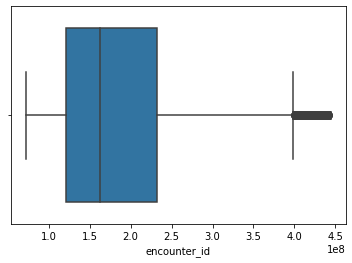

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


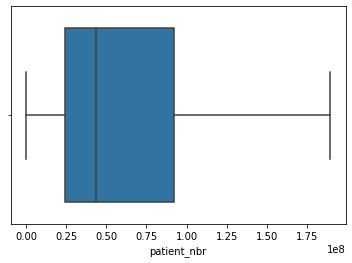

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


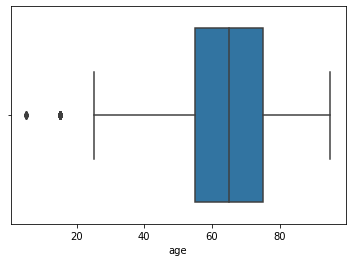

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


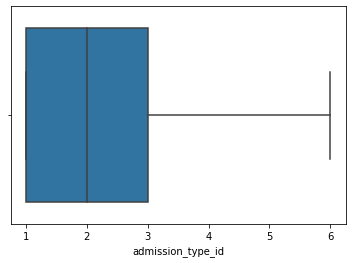

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


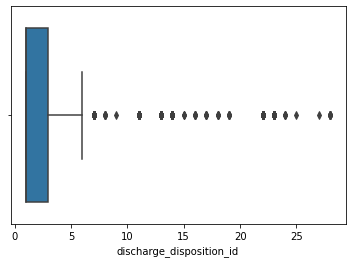

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


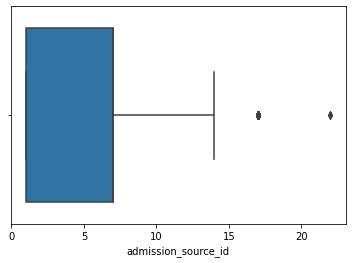

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


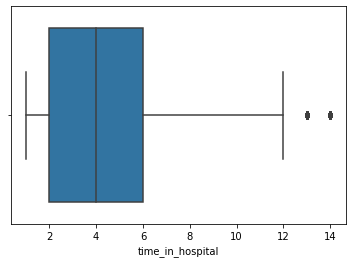

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


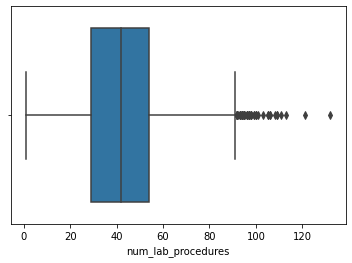

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


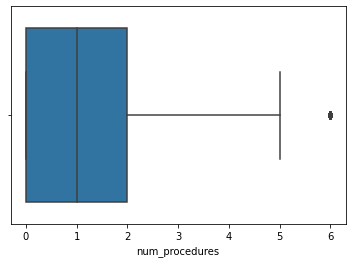

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


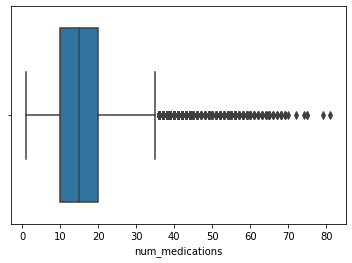

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


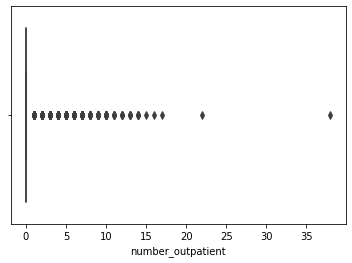

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


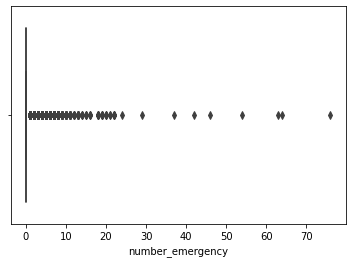

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


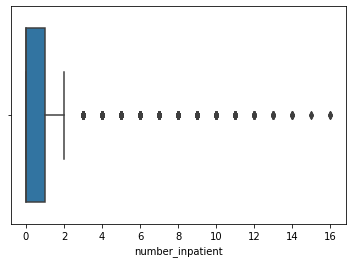

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


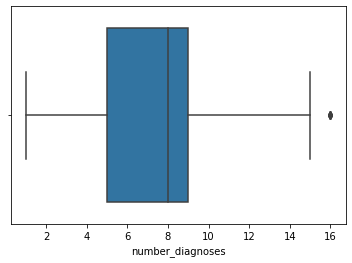

In [19]:
for x in numeric_cols: 
  sns.boxplot(dbdata.loc[:,x])
  plt.show()


In [20]:
#removing outliers above 3 std from the mean of the numeric columns
upperlimit = numeric_cols.mean() + 3*numeric_cols.std()
rmoutlier = numeric_cols[numeric_cols < upperlimit]

for x in numeric_cols.columns: 
  shell = dbdata[x] <= (dbdata[x].mean() + 3*dbdata[x].std())
  dbdata = dbdata[shell]
  
dbdata.shape

(23423, 33)

In [21]:
dbdata.drop_duplicates(subset=['patient_nbr'], inplace=True)
dbdata.shape

(17601, 33)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


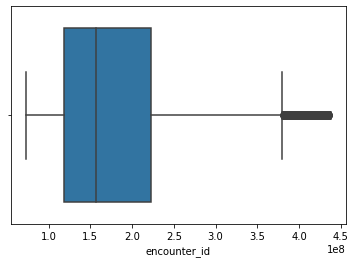

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


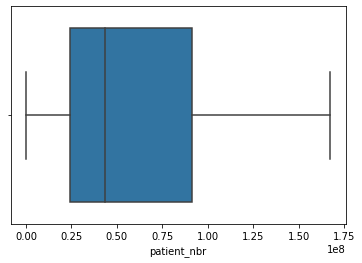

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


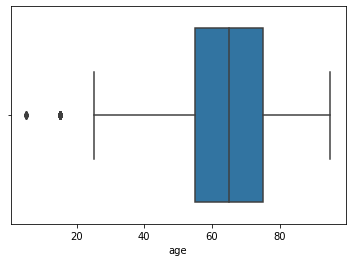

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


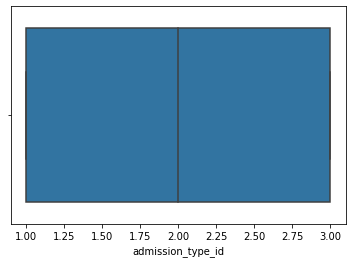

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


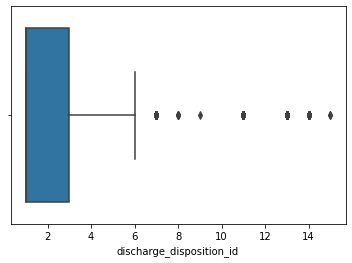

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


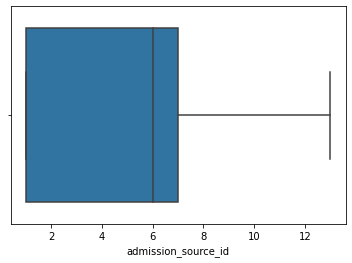

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


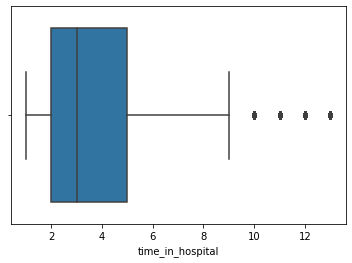

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


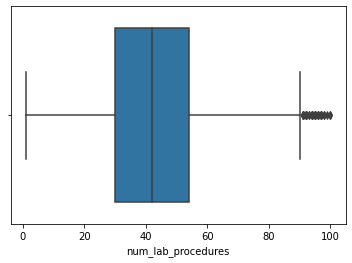

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


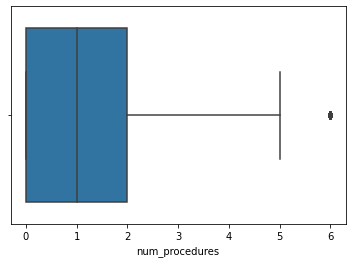

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


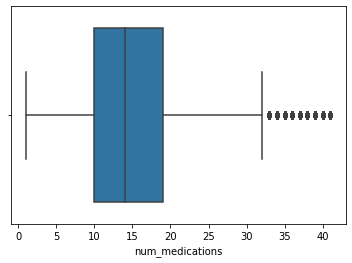

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


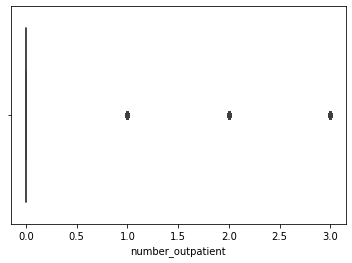

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


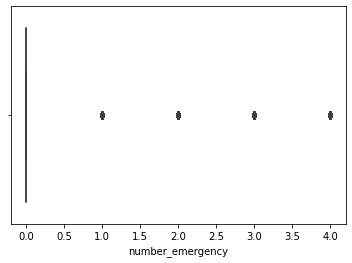

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


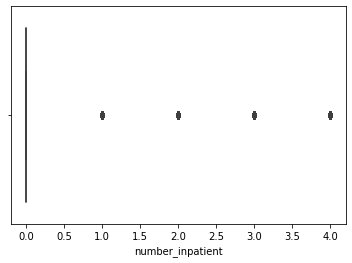

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


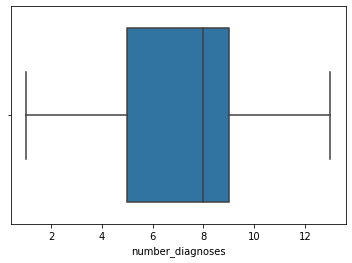

In [22]:
for x in numeric_cols: 
  sns.boxplot(dbdata.loc[:,x])
  plt.show()

In [23]:
dbdata

encounter_id  patient_nbr       race  gender  age  admission_type_id  \
20737       72848634     20377854  Caucasian  Female   65                  2   
20824       73062156     20408121  Caucasian  Female   95                  1   
21083       73731852     20542797  Caucasian    Male   75                  1   
23879       81355914      7239654  Caucasian  Female   75                  1   
23922       81458964     15466212  Caucasian    Male   75                  1   
...              ...          ...        ...     ...  ...                ...   
101249     436785812     87833862  Caucasian    Male   75                  2   
101268     437270768    124367945  Caucasian    Male   65                  1   
101278     437309498     52653654  Caucasian    Male   65                  1   
101284     437331638    142026269  Caucasian    Male   85                  2   
101286     437331728     46488123  Caucasian  Female   85                  2   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
20737                          1                    1                 3   
20824                          1                    7                 4   
21083                          2                    7                10   
23879                          3                    6                12   
23922                          3                    6                12   
...                          ...                  ...               ...   
101249                         3                    1                10   
101268                         1                    7                 2   
101278                         1                    7                 7   
101284                         1                    4                 3   
101286                         1                    1                 2   

       payer_code  ... metformin  glimepiride  glipizide  glyburide  \
20737          MC  ...        No           No         No         No   
20824          MC  ...        No       Steady         No         No   
21083          MC  ...    Steady           No         No         No   
23879          UN  ...        No           No         No         No   
23922          MC  ...        No           No         No         No   
...           ...  ...       ...          ...        ...        ...   
101249         MC  ...        No           No         No         No   
101268         OG  ...    Steady           No         No         No   
101278         BC  ...    Steady           No         No         No   
101284         MC  ...    Steady           No         No         No   
101286         MC  ...        No           No         No         No   

        pioglitazone  rosiglitazone  insulin change diabetesMed readmitted  
20737             No             No   Steady     No         Yes         NO  
20824             No             No       No     No         Yes         NO  
21083             No             No   Steady     Ch         Yes         NO  
23879             No             No   Steady     No         Yes         NO  
23922             No             No       No     No          No         NO  
...              ...            ...      ...    ...         ...        ...  
101249            No             No     Down     Ch         Yes         NO  
101268            No             No       Up     Ch         Yes         NO  
101278            No             No       No     No         Yes         NO  
101284        Steady             No       Up     Ch         Yes         NO  
101286            No             No       No     No          No         NO  

[17601 rows x 33 columns]

In [24]:
readmitted_count = dbdata.groupby(['readmitted']).size().sort_values(ascending=False)
readmitted_count
# Providing the information that 37.25% is the mean average rate of readmittence

readmitted
NO     11045
>30     5158
<30     1398
dtype: int64

## Data Exploration

In [164]:
# Move to the main install cell at the top
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#### Organising Data

In [165]:
dbdata.head()

encounter_id  patient_nbr       race  gender  age  admission_type_id  \
20737      72848634     20377854  Caucasian  Female   65                  2   
20824      73062156     20408121  Caucasian  Female   95                  1   
21083      73731852     20542797  Caucasian    Male   75                  1   
23879      81355914      7239654  Caucasian  Female   75                  1   
23922      81458964     15466212  Caucasian    Male   75                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
20737                         1                    1                 3   
20824                         1                    7                 4   
21083                         2                    7                10   
23879                         3                    6                12   
23922                         3                    6                12   

      payer_code  ... metformin  glimepiride  glipizide  glyburide  \
20737         MC  ...        No           No         No         No   
20824         MC  ...        No       Steady         No         No   
21083         MC  ...    Steady           No         No         No   
23879         UN  ...        No           No         No         No   
23922         MC  ...        No           No         No         No   

       pioglitazone  rosiglitazone  insulin change diabetesMed readmitted  
20737            No             No   Steady     No         Yes         NO  
20824            No             No       No     No         Yes         NO  
21083            No             No   Steady     Ch         Yes         NO  
23879            No             No   Steady     No         Yes         NO  
23922            No             No       No     No          No         NO  

[5 rows x 33 columns]

In [166]:
# Merges the icd_description onto the table
icd_codes = pd.read_csv('/content/drive/MyDrive/big_data_pred/cw/icd_codes.csv')

icd_diabetes = pd.merge(dbdata, icd_codes, left_on='diag_1', right_on= 'ICD_Code')
icd_diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'ICD_Code', 'Description'],
      dtype='object')

In [167]:
icd_diabetes.head()

encounter_id  patient_nbr             race  gender  age  admission_type_id  \
0      72848634     20377854        Caucasian  Female   65                  2   
1      95100504      3986910  AfricanAmerican    Male   55                  1   
2     154320828     23616342        Caucasian  Female   75                  3   
3     185300148      9537282        Caucasian    Male   35                  2   
4     189501090     78921648        Caucasian  Female   75                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                         1                    1                 3         MC   
1                         1                    6                 3         HM   
2                         1                    1                 4         MC   
3                         1                    1                 6         UN   
4                         3                    7                 1         MD   

   ... glipizide  glyburide  pioglitazone  rosiglitazone  insulin  change  \
0  ...        No         No            No             No   Steady      No   
1  ...        No         No            No             No       No      No   
2  ...        No         No            No             No       No      No   
3  ...        No         No            No             No       No      No   
4  ...        No         No            No             No       Up      Ch   

   diabetesMed readmitted ICD_Code                                Description  
0          Yes         NO      V56  Aftercare involving intermittent dialysis  
1           No         NO      V56  Aftercare involving intermittent dialysis  
2          Yes        >30      V56  Aftercare involving intermittent dialysis  
3          Yes         NO      V56  Aftercare involving intermittent dialysis  
4          Yes         NO      V56  Aftercare involving intermittent dialysis  

[5 rows x 35 columns]

In [168]:
# Produces a new table with information from the previous dataset, with the columns needed for analysis
exploration_data = copy.deepcopy(icd_diabetes)

exploration_data = exploration_data[['age', 'race', 'gender', 'Description', 'readmitted', 'time_in_hospital']]
exploration_data.columns = ['age', 'race', 'gender', 'diag_desc', 'Readmitted', 'time_in_hospital']

exploration_data.head()

age             race  gender                                  diag_desc  \
0   65        Caucasian  Female  Aftercare involving intermittent dialysis   
1   55  AfricanAmerican    Male  Aftercare involving intermittent dialysis   
2   75        Caucasian  Female  Aftercare involving intermittent dialysis   
3   35        Caucasian    Male  Aftercare involving intermittent dialysis   
4   75        Caucasian  Female  Aftercare involving intermittent dialysis   

  Readmitted  time_in_hospital  
0         NO                 3  
1         NO                 3  
2        >30                 4  
3         NO                 6  
4         NO                 1

#### Exploring Age Data

In [169]:
age_data = copy.deepcopy(exploration_data)

age_data = age_data[['age', 'Readmitted']]
age_data.head()

age Readmitted
0   65         NO
1   55         NO
2   75        >30
3   35         NO
4   75         NO

In [170]:
# Produces a table of the number of occurences for each age and readmission.
age_data = pd.crosstab(exploration_data['age'], exploration_data['Readmitted'] )
age_data

Readmitted  <30   >30    NO
age                        
5             0     1     5
15            1    20    53
25           16    64   212
35           41   144   461
45          104   437  1143
55          204   819  2029
65          305  1187  2470
75          385  1409  2656
85          291   950  1682
95           50   123   326

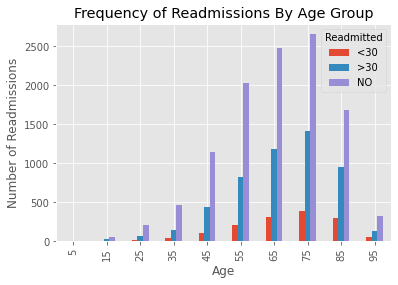

In [171]:
# Produces a barchart showing the frequencies of readmissions by age
age_data.plot(kind = 'bar')
plt.title('Frequency of Readmissions By Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Readmissions')
#plt.savefig('/content/drive/MyDrive/big_data_pred/cw/graphs_out/Frequency_of_Readmissions_By_Age_Group.png', dpi=300)
plt.show()

In [172]:
# Converts the table into percentages of totals
age_data_perc = age_data[['<30', '>30', 'NO']] = age_data[['<30', '>30', 'NO']].apply(lambda x: x/x.sum() * 100, axis=1)
age_data_perc

Readmitted        <30        >30         NO
age                                        
5            0.000000  16.666667  83.333333
15           1.351351  27.027027  71.621622
25           5.479452  21.917808  72.602740
35           6.346749  22.291022  71.362229
45           6.175772  25.950119  67.874109
55           6.684142  26.834862  66.480996
65           7.698132  29.959616  62.342251
75           8.651685  31.662921  59.685393
85           9.955525  32.500855  57.543620
95          10.020040  24.649299  65.330661

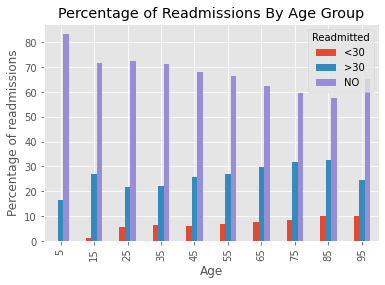

In [173]:
# Produces a graph showing the percentages of readmissions by age
age_data_perc.plot(kind = 'bar')
plt.title('Percentage of Readmissions By Age Group')
plt.xlabel('Age')
plt.ylabel('Percentage of readmissions')
# plt.savefig('/content/drive/MyDrive/big_data_pred/cw/graphs_out/Percentage_of_Readmissions_By_Age_Group.png', dpi=300)
plt.show()

#### Exploring Race Data

In [174]:
# Produces a table of the number of occurences for each race and readmission.
race_data = pd.crosstab(exploration_data['race'], exploration_data['Readmitted'] )
race_data

Readmitted        <30   >30    NO
race                             
AfricanAmerican   295   872  2375
Asian               9    40    97
Caucasian        1055  4068  8139
Hispanic           19    83   229
Other              19    91   197

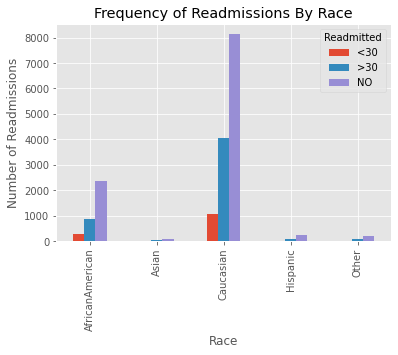

In [175]:
# Produces a barchart showing the frequencies of readmissions by race
race_data.plot(kind = 'bar')
plt.title('Frequency of Readmissions By Race')
plt.xlabel('Race')
plt.ylabel('Number of Readmissions')
# plt.savefig('/content/drive/MyDrive/big_data_pred/cw/graphs_out/Frequency_of_Readmissions_By_Race.png', dpi=300)
plt.show()

In [176]:
# Shows the nummber of different race values in the dataset
exploration_data['race'].value_counts()

Caucasian          13262
AfricanAmerican     3542
Hispanic             331
Other                307
Asian                146
Name: race, dtype: int64

In [177]:
# Converts the table into percentages of totals
race_data_perc = race_data[['<30', '>30', 'NO']] = race_data[['<30', '>30', 'NO']].apply(lambda x: x/x.sum() * 100, axis=1)
race_data_perc

Readmitted            <30        >30         NO
race                                           
AfricanAmerican  8.328628  24.618859  67.052513
Asian            6.164384  27.397260  66.438356
Caucasian        7.955060  30.674106  61.370834
Hispanic         5.740181  25.075529  69.184290
Other            6.188925  29.641694  64.169381

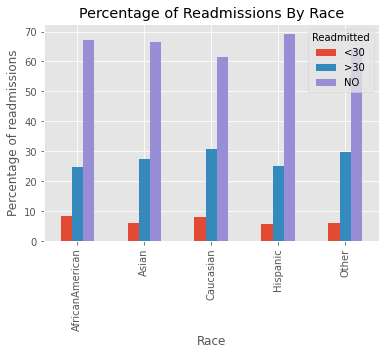

In [178]:
# Produces a graph showing the percentages of readmissions by race
race_data_perc.plot(kind = 'bar')
plt.title('Percentage of Readmissions By Race')
plt.xlabel('Race')
plt.ylabel('Percentage of readmissions')
# plt.savefig('/content/drive/MyDrive/big_data_pred/cw/graphs_out/Percentage_of_Readmissions_By_Race.png', dpi=300)
plt.show()

#### Exploring Gender Data

In [179]:
# Produces a table of the number of occurences for each gender and readmission.
gender_data = pd.crosstab(exploration_data['gender'], exploration_data['Readmitted'] )
gender_data

Readmitted  <30   >30    NO
gender                     
Female      751  2787  5892
Male        646  2367  5145

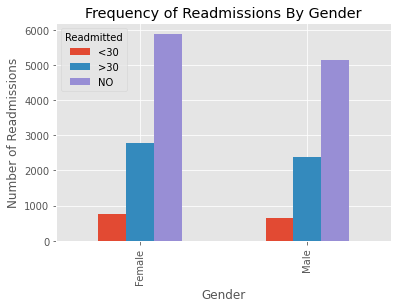

In [180]:
# Produces a barchart showing the frequencies of readmissions by gender
gender_data.plot(kind = 'bar')
plt.title('Frequency of Readmissions By Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Readmissions')
# plt.savefig('/content/drive/MyDrive/big_data_pred/cw/graphs_out/Frequency_of_Readmissions_By_Gender.png', dpi=300)
plt.show()

In [181]:
exploration_data['gender'].value_counts()

Female    9430
Male      8158
Name: gender, dtype: int64

In [182]:
# Converts the table into percentages of totals
gender_data_perc = gender_data[['<30', '>30', 'NO']] = gender_data[['<30', '>30', 'NO']].apply(lambda x: x/x.sum() * 100, axis=1)
gender_data_perc

Readmitted       <30        >30         NO
gender                                    
Female      7.963945  29.554613  62.481442
Male        7.918608  29.014464  63.066928

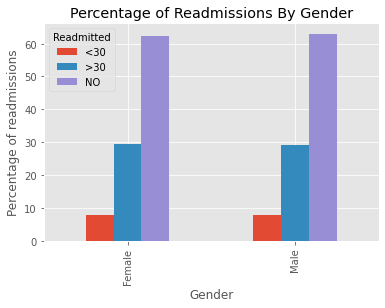

In [183]:
# Produces a graph showing the percentages of readmissions by gender
gender_data_perc.plot(kind = 'bar')
plt.title('Percentage of Readmissions By Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of readmissions')
plt.show()

#### Exploring Diagnosis Data

In [184]:
# Produces a table of the number of occurences for each diagnosis type and readmission.
diagnosis_data = pd.crosstab(exploration_data['diag_desc'], exploration_data['Readmitted'], margins = True)
diagnosis_data

Readmitted                                           <30   >30     NO    All
diag_desc                                                                   
Abnormality of forces of labour                        0     1      8      9
Abnormality of organs and soft tissues of pelvis       0     1     14     15
Abscess of anal and rectal regions                     0     8     11     19
Abscess of lung and mediastinum                        1     2      2      5
Acquired deformities of toe                            0     1      1      2
...                                                  ...   ...    ...    ...
Viral and chlamydial infection in conditions cl...     0     3      9     12
Viral hepatitis                                        0     1      2      3
Viral pneumonia                                        0     1      0      1
Visual disturbances                                    1     0      0      1
All                                                 1397  5154  11037  17588

[535 rows x 4 columns]

In [185]:
diagnosis_data = exploration_data[['diag_desc', 'Readmitted']]
# Converts readmitted to '1' and not readmitted to '0'
diagnosis_data['Readmitted'] = diagnosis_data['Readmitted'].map({'<30': 1, '>30': 1, 'NO': 0})
# Produces a table of the amount of times each diagnosis type was readmitted or not
diagnosis_data = diagnosis_data.groupby(['diag_desc', 'Readmitted']).size().sort_values(ascending=False)
diagnosis_data = diagnosis_data.to_frame()
diagnosis_data.sort_values(by = ['diag_desc'])
diagnosis_data.rename({0: 'count'}, axis=1, inplace=True)
diagnosis_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count
diag_desc                                          Readmitted       
Other forms of chronic ischaemic heart disease     0             796
                                                   1             507
Heart failure                                      1             499
                                                   0             477
Symptoms involving respiratory system and other... 0             473
...                                                              ...
Nonspecific abnormal findings in other body sub... 1               1
Noninflammatory disorders of vagina                0               1
Nondependent abuse of drugs                        0               1
Diabetes mellitus without mention of complicati... 1               1
Visual disturbances                                1               1

[879 rows x 1 columns]

In [186]:
# Produces a table with just readmitted. To be merged later.
readmitted_diag = diagnosis_data.query('Readmitted == 1')
readmitted_diag.rename({'count': 'readmitted_count'}, axis=1, inplace=True)
readmitted_diag

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


readmitted_count
diag_desc                                          Readmitted                  
Other forms of chronic ischaemic heart disease     1                        507
Heart failure                                      1                        499
Pneumonia, organism unspecified                    1                        267
Symptoms involving respiratory system and other... 1                        237
Cardiac dysrhythmias                               1                        205
...                                                                         ...
Dermatitis due to substances taken internally      1                          1
Nonspecific abnormal results of function studies   1                          1
Nonspecific abnormal findings in other body sub... 1                          1
Diabetes mellitus without mention of complicati... 1                          1
Visual disturbances                                1                          1

[392 rows x 1 columns]

In [187]:
# Produces a table with patients not readmitted. To be merged later.
not_readmitted_diag = diagnosis_data.query('Readmitted == 0')
not_readmitted_diag.rename({'count': 'not_readmitted_count'}, axis=1, inplace=True)
not_readmitted_diag

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


not_readmitted_count
diag_desc                                          Readmitted                      
Other forms of chronic ischaemic heart disease     0                            796
Heart failure                                      0                            477
Symptoms involving respiratory system and other... 0                            473
Acute myocardial infarction                        0                            378
Osteo-arthrosis and allied disorders               0                            371
...                                                                             ...
Dentofacial anomalies, including malocclusion      0                              1
Nutritional marasmus                               0                              1
Nonspecific abnormal findings on radiological a... 0                              1
Noninflammatory disorders of vagina                0                              1
Nondependent abuse of drugs                        0                              1

[487 rows x 1 columns]

In [188]:
# Completes an outer join on the above tables, to compare the amount of readmissions for each diagnosis type
merged_diag = not_readmitted_diag.merge(readmitted_diag, on='diag_desc', how='outer')

# Replaces Na values with 0
# As they were only missing initially because they were missing values, i.e. 0
merged_diag = merged_diag.fillna(0)

# Removes any data with less that 30 cases reported. This removes any extreme outliers
merged_diag = merged_diag[merged_diag['not_readmitted_count'] + merged_diag['readmitted_count'] > 30]

# Produces a new column with the percentage of people that were readmitted, for each diagnosis type
merged_diag['perc_of_readmitted'] = round((merged_diag['readmitted_count'] / (merged_diag['readmitted_count'] + merged_diag['not_readmitted_count'])) * 100, 2)
merged_diag = merged_diag.sort_values(by='perc_of_readmitted', ascending=False)
merged_diag

not_readmitted_count  \
diag_desc                                                                  
Hypertensive heart and renal disease                                16.0   
Pleurisy                                                            19.0   
Heart failure                                                      477.0   
Other disorders of intestine                                        24.0   
Diabetes with peripheral circulatory disorders,...                  80.0   
...                                                                  ...   
Malignant neoplasm of prostate                                      30.0   
Spondylosis and allied disorders                                    41.0   
Other disorders of cervical region                                  26.0   
Genital prolapse                                                    37.0   
Diabetes mellitus                                                   37.0   

                                                    readmitted_count  \
diag_desc                                                              
Hypertensive heart and renal disease                            24.0   
Pleurisy                                                        22.0   
Heart failure                                                  499.0   
Other disorders of intestine                                    23.0   
Diabetes with peripheral circulatory disorders,...              76.0   
...                                                              ...   
Malignant neoplasm of prostate                                   8.0   
Spondylosis and allied disorders                                 9.0   
Other disorders of cervical region                               5.0   
Genital prolapse                                                 6.0   
Diabetes mellitus                                                5.0   

                                                    perc_of_readmitted  
diag_desc                                                               
Hypertensive heart and renal disease                             60.00  
Pleurisy                                                         53.66  
Heart failure                                                    51.13  
Other disorders of intestine                                     48.94  
Diabetes with peripheral circulatory disorders,...               48.72  
...                                                                ...  
Malignant neoplasm of prostate                                   21.05  
Spondylosis and allied disorders                                 18.00  
Other disorders of cervical region                               16.13  
Genital prolapse                                                 13.95  
Diabetes mellitus                                                11.90  

[97 rows x 3 columns]

In [189]:
readmitted_count = dbdata.groupby(['readmitted']).size().sort_values(ascending=False)
perc_readmitted = ((readmitted_count[1] + readmitted_count[2]) / (readmitted_count[0] + readmitted_count[1] + readmitted_count[2]) * 100)
print("The mean average of percentage of readmissions was ", round(perc_readmitted, 2), "%", sep = "")
# Providing the information that 37.25% is the mean average rate of readmittence

The mean average of percentage of readmissions was 37.25%


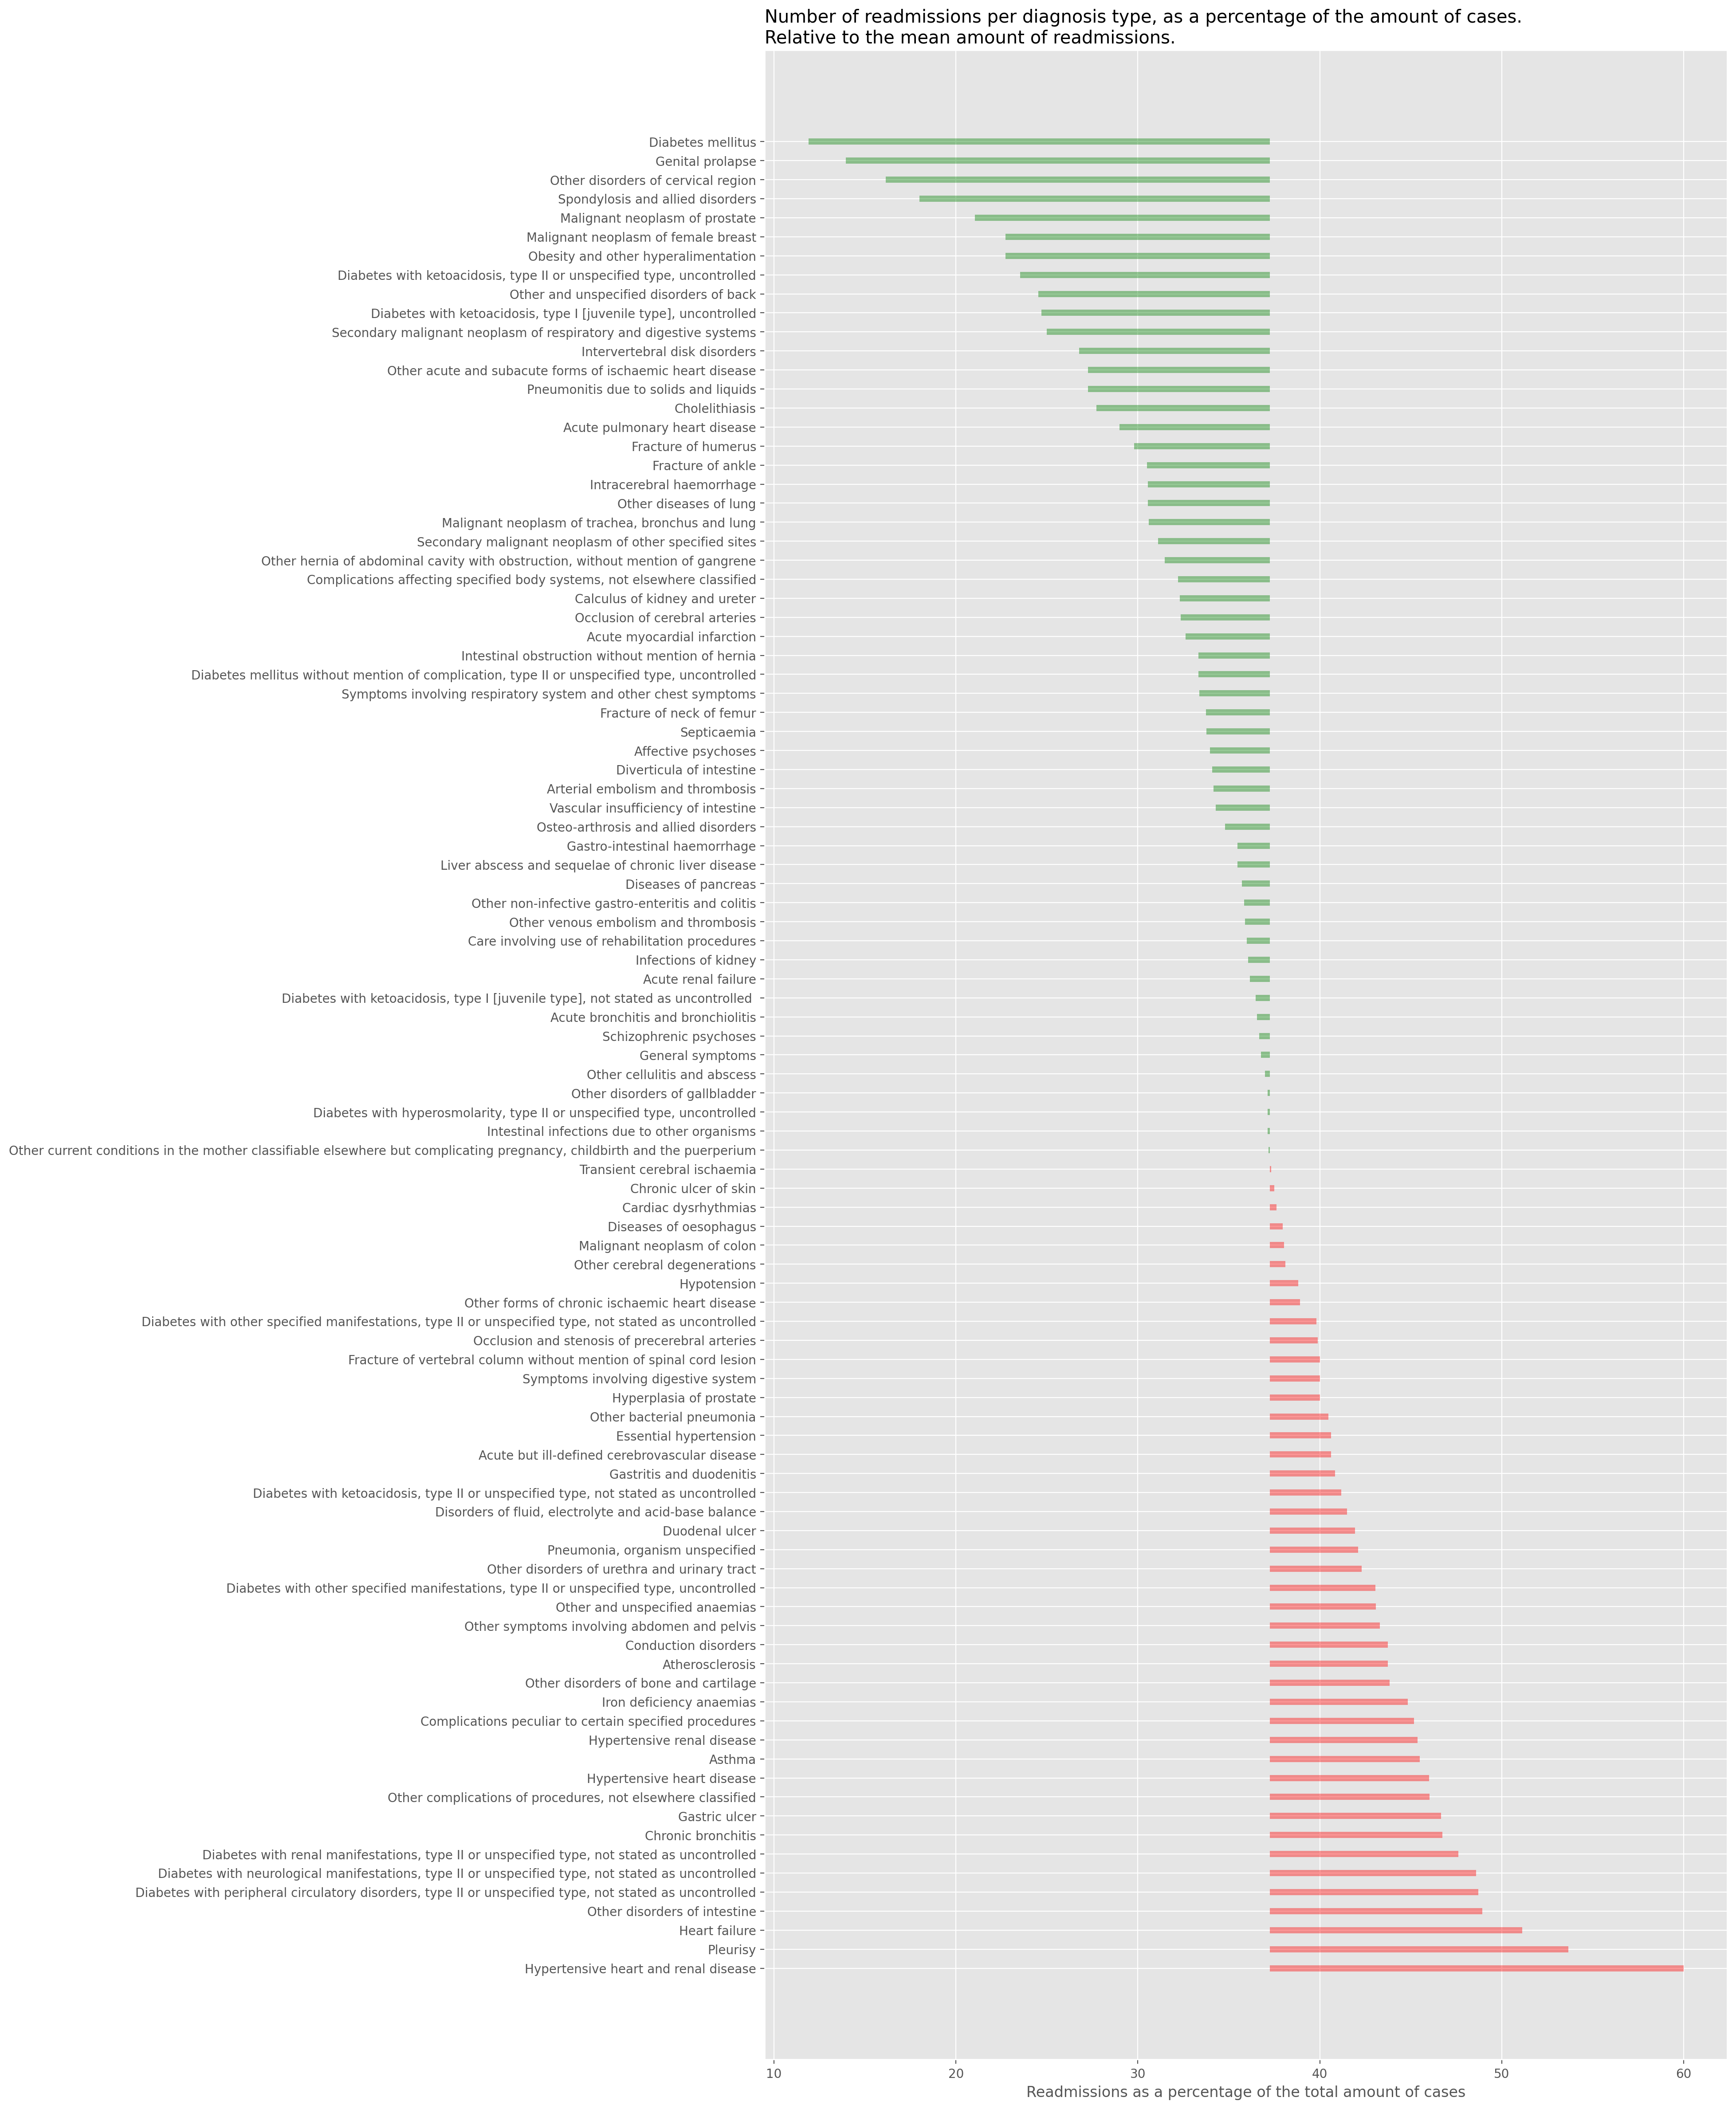

In [190]:
# Produces a graph to display the above data
# Centers the data around the mean rate of readmissions
merged_diag['colors'] = ['red' if x > round(perc_readmitted, 2) else 'green' for x in merged_diag['perc_of_readmitted']]
# Increases the resolution and size so the output is usable
plt.figure(figsize=(14,30), dpi= 200)
# Defines the graph
plt.hlines(y=merged_diag.index, xmin=37.25, xmax=merged_diag.perc_of_readmitted, color=merged_diag.colors, alpha=0.4, linewidth=5)
plt.xlabel('Readmissions as a percentage of the total amount of cases')
plt.title('Number of readmissions per diagnosis type, as a percentage of the amount of cases.\nRelative to the mean amount of readmissions.', loc='left')
# plt.savefig('/content/drive/MyDrive/big_data_pred/cw/graphs_out/Number_of_readmissions_per_diagnosis_type.png',figsize=(20,25), dpi=200)
plt.show()

#### Exploring Length of Stay Data

In [191]:
# Produces a table of the length of stay in hospital, compared to age.
stay_length_data = pd.crosstab(exploration_data['age'], exploration_data['time_in_hospital'] )
stay_length_data

time_in_hospital   1    2    3    4    5    6    7    8    9   10  11  12  13
age                                                                          
5                   3    2    0    1    0    0    0    0    0   0   0   0   0
15                 25   22   10    9    2    2    1    3    0   0   0   0   0
25                 55   72   68   41   16   13   10    2    5   8   1   0   1
35                103  157  134   83   64   29   27   15   11   7   5   4   7
45                347  386  297  193  135   84   84   53   39  19  18  11  18
55                651  599  530  431  249  181  139   82   68  37  27  38  20
65                775  684  700  486  344  276  225  170   85  72  63  48  34
75                733  724  782  586  449  335  230  180  136  92  86  60  57
85                325  425  509  429  321  248  214  139   98  64  62  49  40
95                 51   61   94   66   64   45   33   25   25  16  13   3   3

In [192]:
# Converts the table into percentages of totals
stay_length_data_perc = stay_length_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]] = stay_length_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].apply(lambda x: x/x.sum() * 100, axis=1)
stay_length_data_perc

time_in_hospital         1          2          3          4          5   \
age                                                                       
5                 50.000000  33.333333   0.000000  16.666667   0.000000   
15                33.783784  29.729730  13.513514  12.162162   2.702703   
25                18.835616  24.657534  23.287671  14.041096   5.479452   
35                15.944272  24.303406  20.743034  12.848297   9.907121   
45                20.605701  22.921615  17.636580  11.460808   8.016627   
55                21.330275  19.626474  17.365662  14.121887   8.158585   
65                19.560828  17.264008  17.667845  12.266532   8.682484   
75                16.471910  16.269663  17.573034  13.168539  10.089888   
85                11.118714  14.539856  17.413616  14.676702  10.981868   
95                10.220441  12.224449  18.837675  13.226453  12.825651   

time_in_hospital        6         7         8         9         10        11  \
age                                                                            
5                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15                2.702703  1.351351  4.054054  0.000000  0.000000  0.000000   
25                4.452055  3.424658  0.684932  1.712329  2.739726  0.342466   
35                4.489164  4.179567  2.321981  1.702786  1.083591  0.773994   
45                4.988124  4.988124  3.147268  2.315914  1.128266  1.068884   
55                5.930537  4.554391  2.686763  2.228047  1.212320  0.884666   
65                6.966179  5.678950  4.290762  2.145381  1.817264  1.590106   
75                7.528090  5.168539  4.044944  3.056180  2.067416  1.932584   
85                8.484434  7.321245  4.755388  3.352720  2.189531  2.121108   
95                9.018036  6.613226  5.010020  5.010020  3.206413  2.605210   

time_in_hospital        12        13  
age                                   
5                 0.000000  0.000000  
15                0.000000  0.000000  
25                0.000000  0.342466  
35                0.619195  1.083591  
45                0.653207  1.068884  
55                1.245085  0.655308  
65                1.211509  0.858152  
75                1.348315  1.280899  
85                1.676360  1.368457  
95                0.601202  0.601202

In [193]:
# Removes some extreme values whihc subtract from the overall analysis 
stay_length_data_perc.drop(13, inplace=True, axis=1)
stay_length_data_perc.drop(12, inplace=True, axis=1)
stay_length_data_perc.drop(11, inplace=True, axis=1)
stay_length_data_perc.drop(5, inplace=True, axis=0)
stay_length_data_perc.drop(15, inplace=True, axis=0)
stay_length_data_perc.drop(25, inplace=True, axis=0)
stay_length_data_perc

time_in_hospital         1          2          3          4          5   \
age                                                                       
35                15.944272  24.303406  20.743034  12.848297   9.907121   
45                20.605701  22.921615  17.636580  11.460808   8.016627   
55                21.330275  19.626474  17.365662  14.121887   8.158585   
65                19.560828  17.264008  17.667845  12.266532   8.682484   
75                16.471910  16.269663  17.573034  13.168539  10.089888   
85                11.118714  14.539856  17.413616  14.676702  10.981868   
95                10.220441  12.224449  18.837675  13.226453  12.825651   

time_in_hospital        6         7         8         9         10  
age                                                                 
35                4.489164  4.179567  2.321981  1.702786  1.083591  
45                4.988124  4.988124  3.147268  2.315914  1.128266  
55                5.930537  4.554391  2.686763  2.228047  1.212320  
65                6.966179  5.678950  4.290762  2.145381  1.817264  
75                7.528090  5.168539  4.044944  3.056180  2.067416  
85                8.484434  7.321245  4.755388  3.352720  2.189531  
95                9.018036  6.613226  5.010020  5.010020  3.206413

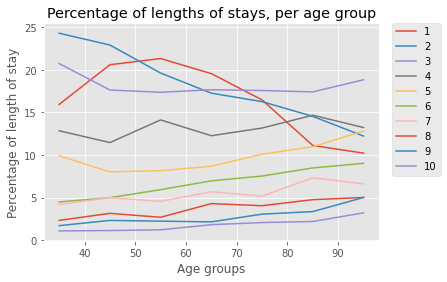

In [194]:
# Produces a graph showing the percentages of readmissions by gender
stay_length_data_perc.plot(kind = 'line')
plt.title('Percentage of lengths of stays, per age group')
plt.xlabel('Age groups')
plt.ylabel('Percentage of length of stay')
plt.legend(loc=(1.04,0.3))
plt.show()

# Question 2

Data exploration: Carry out a data exploration using appropriate plots to identify
patterns or trends in the data. Bearing in mind our objective, we need to assess the
impact of the predictors e.g. age, race, gender, or diagnosis type on the outcome
(readmitted). Use graphs to prove or disprove the following hypotheses:

 Age has a higher impact on readmission.

 African Americans are more likely to be re-admitted than other ethnic groups.

 Women patients are more likely to be re-admitted than men.

 Diagnose types have a higher impact on re-admission rates. For this purpose, you need to take into account the icd_codes and plot say diag_1 vs readmitted.

**Hint 1:** You may want to join both datasets diabetic_data.csv and icd_codes.csv.

**Hint 2:** Check for distinct values in categorical data and their frequencies. If there are too many distinct values (levels), then you may want to reduce the number of levels by grouping some of the detailed levels. This could be the case for race or diagnosis types.

**Hint 3:** You may want to transform the readmitted column values to be 0 if the value is NO and 1 otherwise for a better exploration of the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


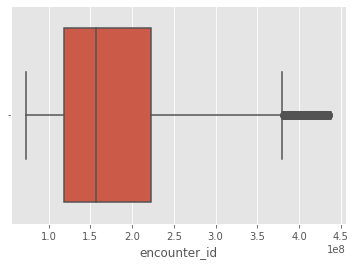

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


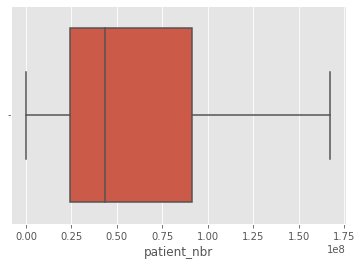

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


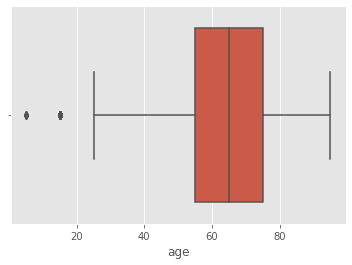

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


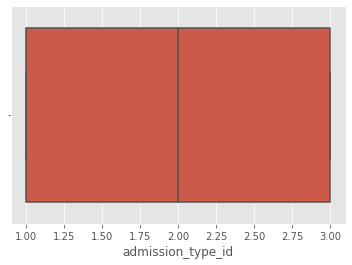

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


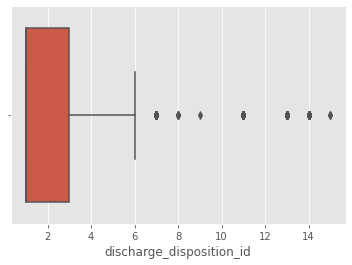

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


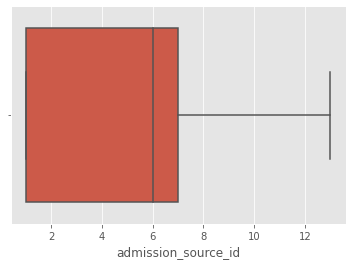

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


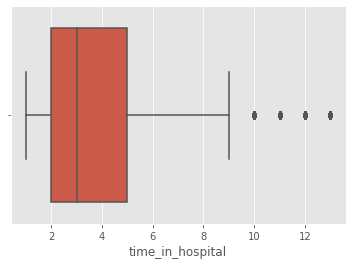

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


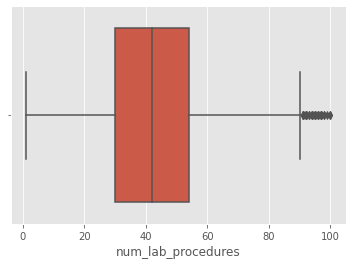

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


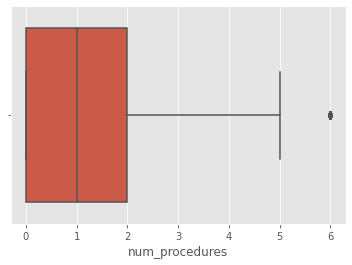

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


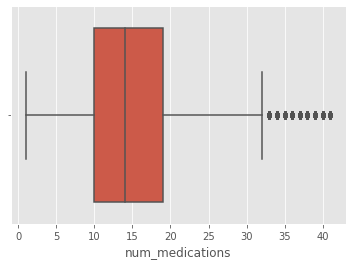

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


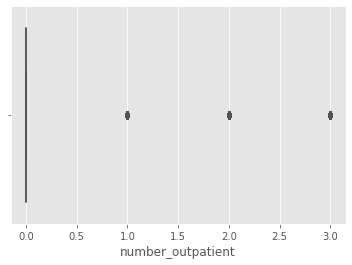

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


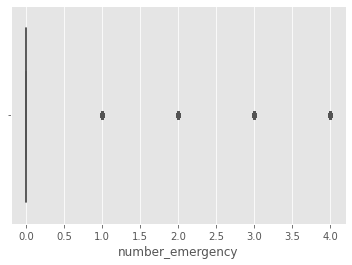

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


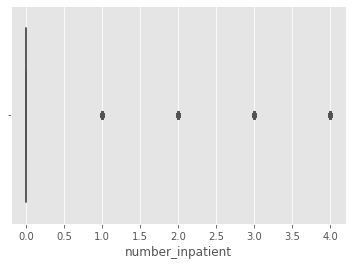

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


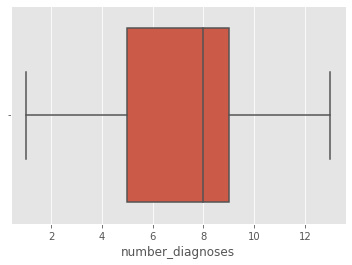

In [117]:
for x in dbdata.dtypes[dbdata.dtypes != "object"].index: 
  sns.boxplot(dbdata.loc[:,x])
  plt.show()

In [118]:
dbdata['diag_1'].value_counts()
dbdata['diag_2'].value_counts()
dbdata['diag_3'].value_counts()

250    2319
401    1667
276     846
428     668
414     635
       ... 
323       1
987       1
192       1
379       1
V16       1
Name: diag_3, Length: 533, dtype: int64

In [119]:
icd_codes = pd.read_csv('icd_codes.csv')

In [120]:
icd_diabetes = pd.merge(dbdata, icd_codes, left_on='diag_1', right_on= 'ICD_Code')
icd_diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'ICD_Code', 'Description'],
      dtype='object')

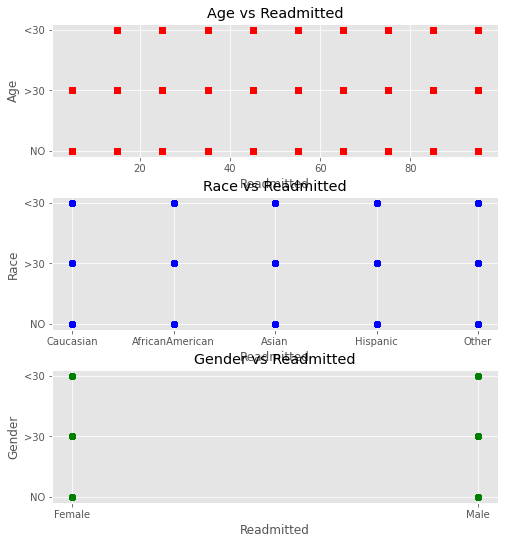

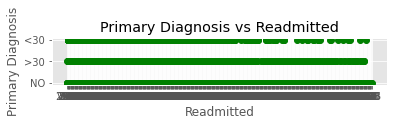

In [121]:
# plot with various axes scales
fig = plt.figure(figsize=(8, 12))
f = plt.figure(1)
f.subplots_adjust(hspace=.3)
## Plot Age vs readmitted
plt.subplot(4,1,1)
plt.plot(icd_diabetes['age'],icd_diabetes['readmitted'],'rs')
plt.ylabel('Age')
plt.xlabel('Readmitted')
plt.grid(True)
plt.title('Age vs Readmitted')

## Plot Race vs Readmitted
plt.subplot(4,1,2)
plt.plot(icd_diabetes['race'],icd_diabetes['readmitted'],'bo')
plt.ylabel('Race')
plt.xlabel('Readmitted')
plt.grid(True)
plt.title('Race vs Readmitted')

## Plot Gender vs Readmitted
plt.subplot(4,1,3)
plt.plot(icd_diabetes['gender'],icd_diabetes['readmitted'],'go')
plt.ylabel('Gender')
plt.xlabel('Readmitted')
plt.title('Gender vs Readmitted')
plt.grid(True)
plt.show()

## Plot Primary Diagnosis vs Readmitted
plt.subplot(4,1,4)
plt.plot(icd_diabetes['diag_1'],icd_diabetes['readmitted'],'go')
plt.ylabel('Primary Diagnosis')
plt.xlabel('Readmitted')
plt.title('Primary Diagnosis vs Readmitted')
plt.grid(True)
plt.show()




In [122]:
# %matplotlib inline
# pd.crosstab(icd_diabetes.diag_1,icd_diabetes.readmitted).plot(kind='bar')
# plt.title('Purchase Frequency for Job Title')
# plt.xlabel('Job')
# plt.ylabel('Frequency of Purchase')
# plt.savefig('purchase_fre_job')

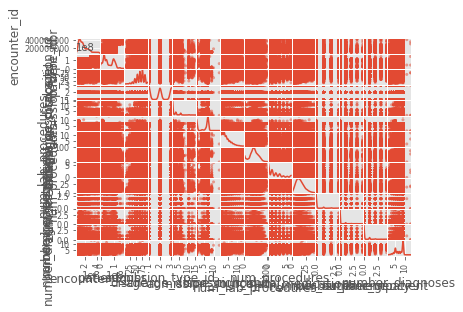

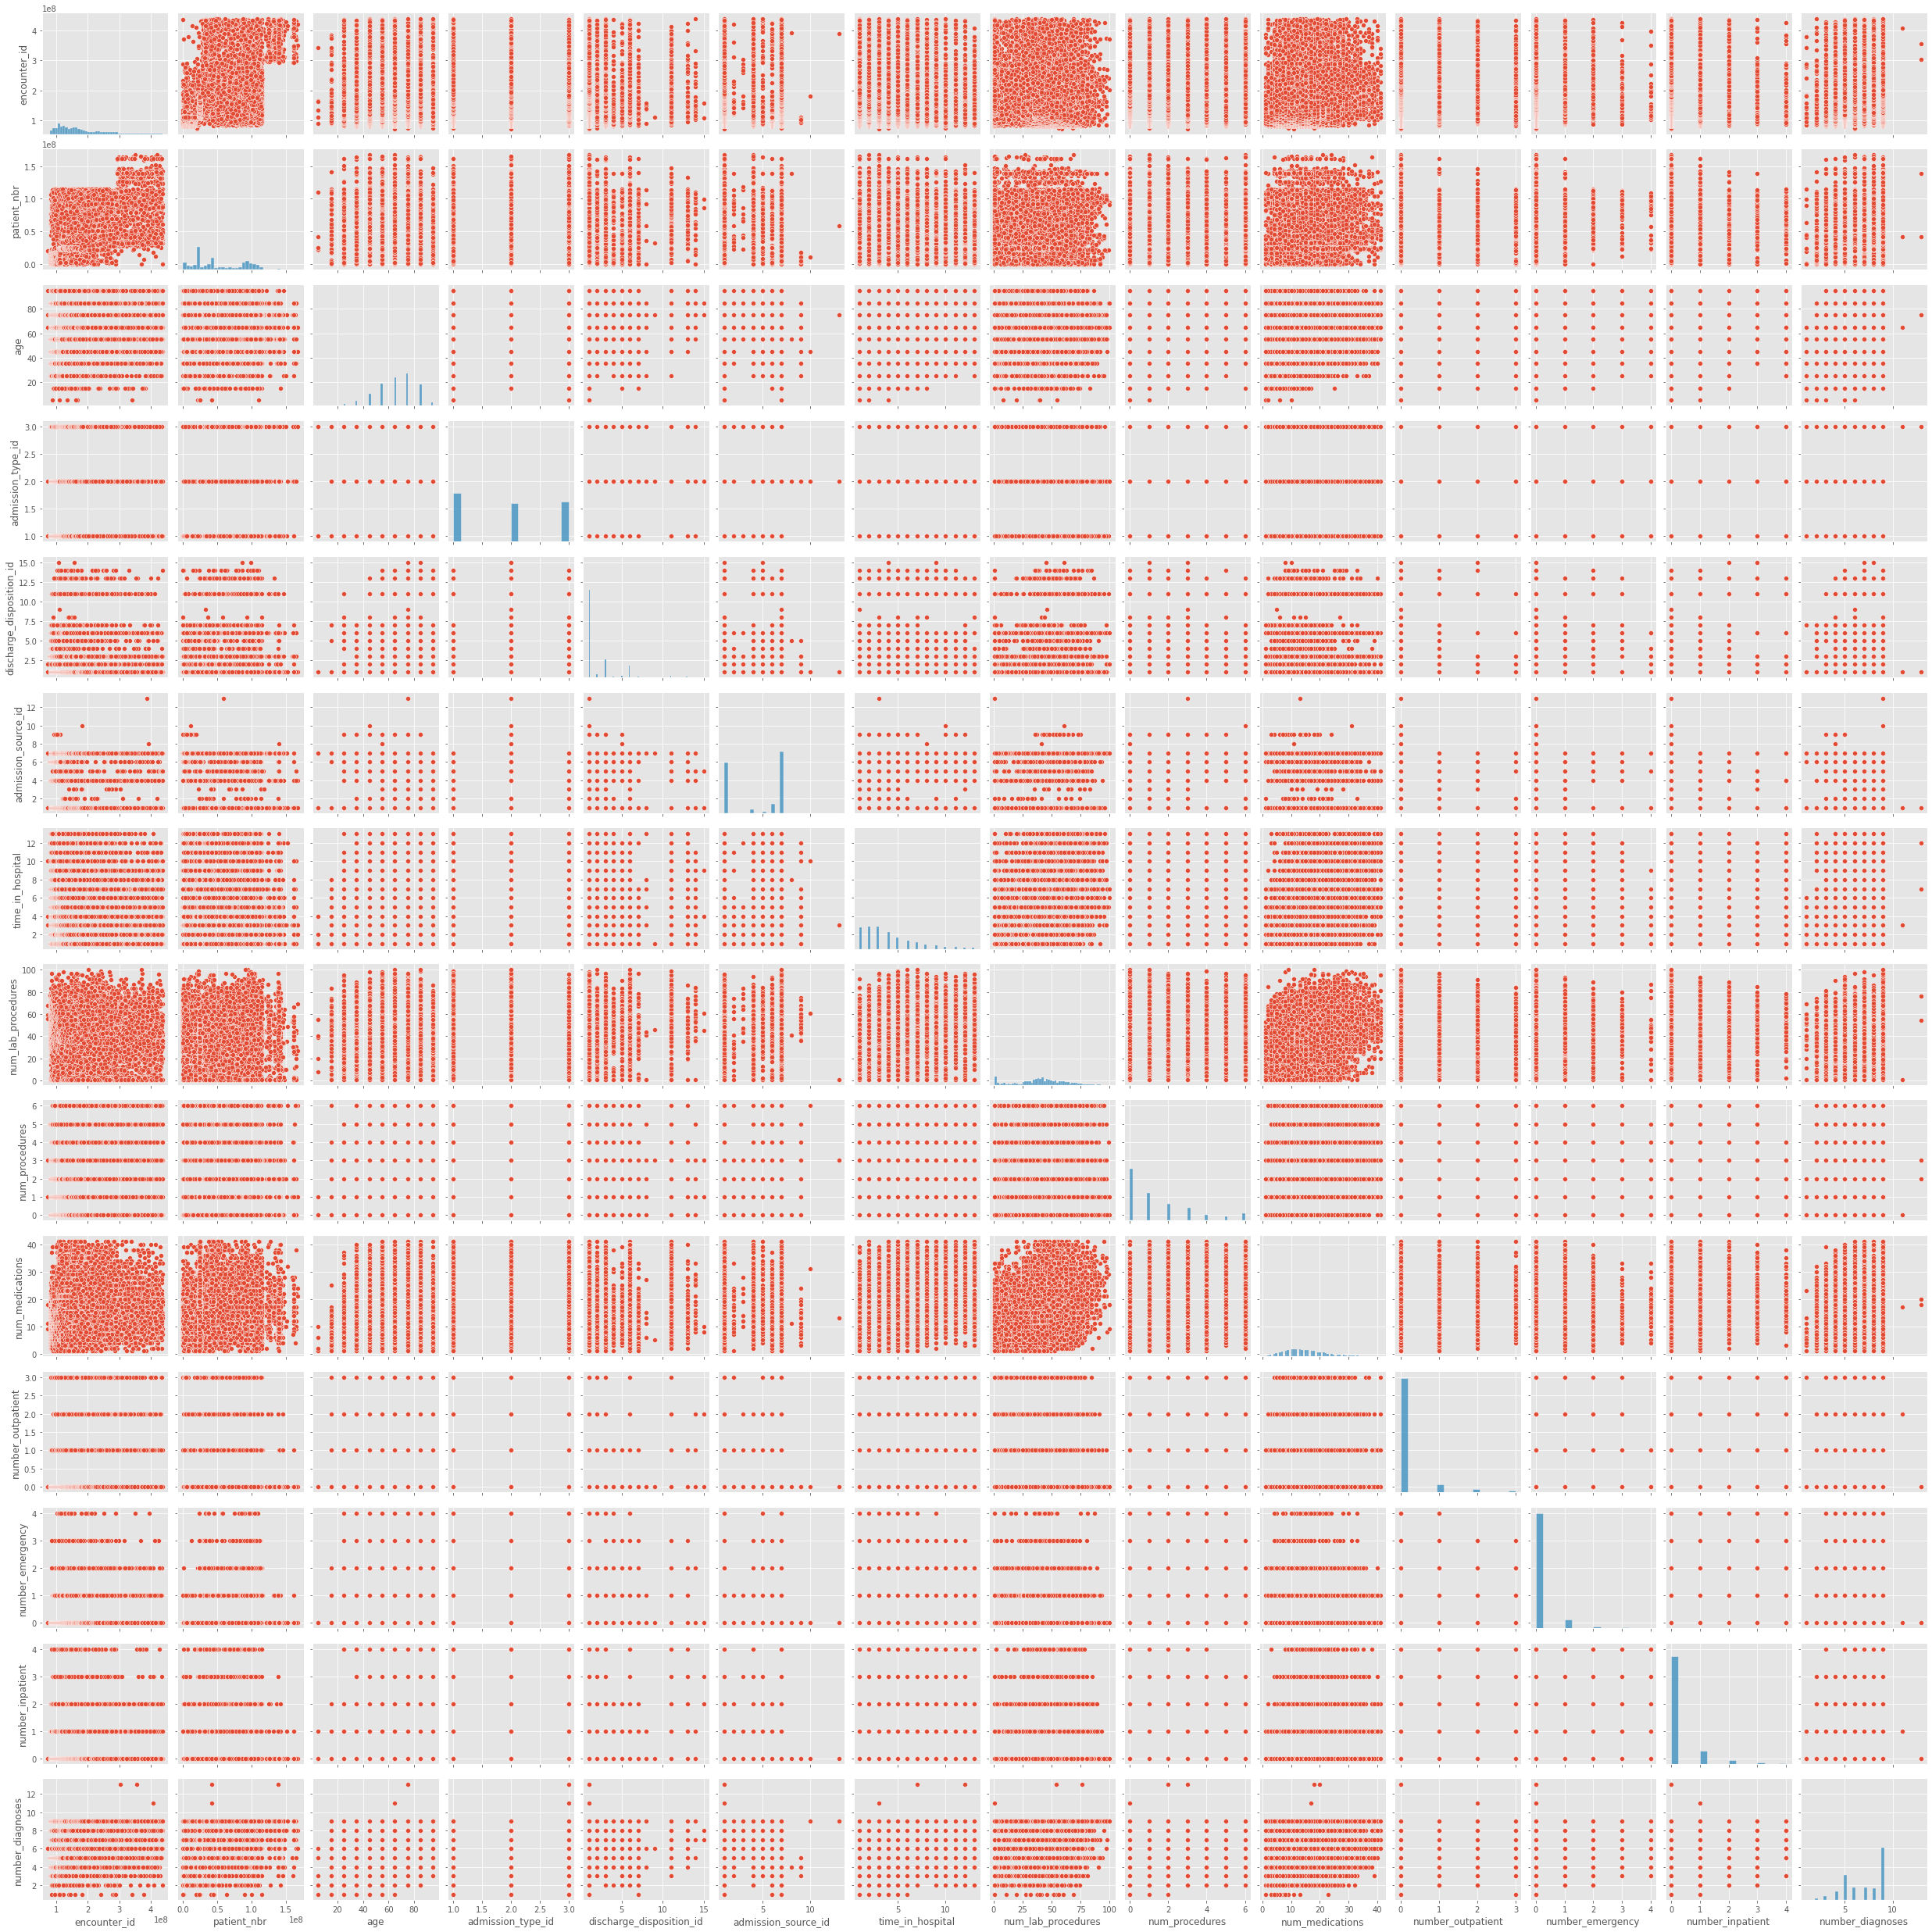

In [123]:
scatter_matrix(icd_diabetes, diagonal='kde')
plt.show()

pairplot(icd_diabetes)
plt.show()

IndexError: ignored

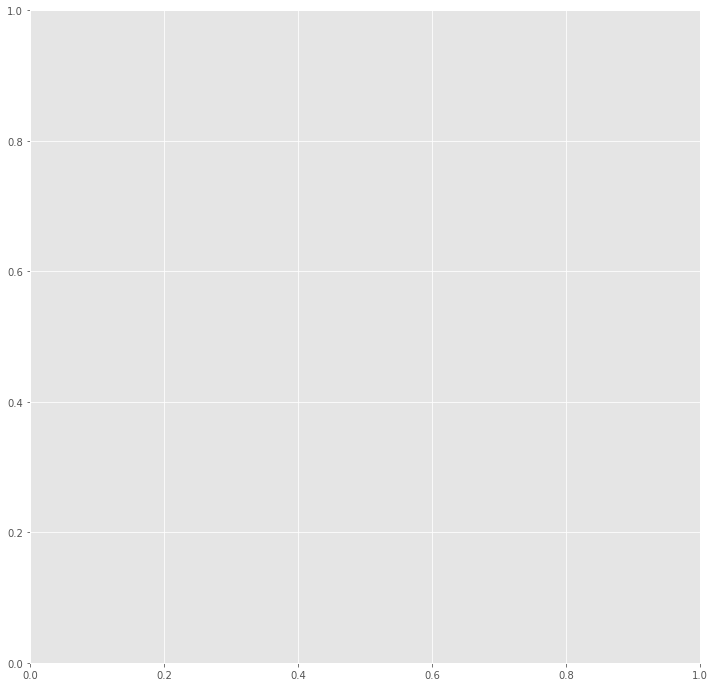

In [124]:
## Numeric columns
plot_cols = ["age",
              "race",
              "gender",
              "diag_1"]

## Create a scatter plot matric --- a pair-wise scatter plots         
def auto_pairs(plot_cols, df):
    fig = plt.figure(1, figsize=(12, 12))
    fig.clf()
    ax = fig.gca()
    scatter_matrix(df[plot_cols], diagonal='hist', ax = ax)
    #import seaborn as sns
    #sns.set(style="ticks")
    #sns.pairplot(df[plot_cols])
    plt.show()
    return('Done')
auto_pairs(plot_cols, icd_diabetes)

In [ ]:
## Create conditional scatter plot
def auto_scatter(df, plot_cols):
    import seaborn as sns
    for col in plot_cols:
        g = sns.FacetGrid(df,\
        margin_titles=True,\
        hue="fuel-type",\
        palette={"diesel": "red", "gas": "blue"},\
        height=8)
        g.map(plt.scatter, col, "price")
        g.add_legend()
        plt.show()
        
plot_cols3 = ["length", \
               "curb-weight", \
               "engine-size", \
               "city-mpg"]
auto_scatter(df_cln, plot_cols3)

In [ ]:
# Let us check the impact of property size on the market value
icd_d.plot.scatter(x='Property_size', y='Market_value',c='DarkBlue')
plt.xlabel('Property_size')
plt.ylabel('Market_value')
plt.show()

In [ ]:
f, ax = plt.subplots(2)
data.plot.scatter(x="curb-weight",y="engine-size",ax=ax[0], title="Original data")
data_norm.plot.scatter(x="curb-weight", y="engine-size", ax=ax[1], title="Normalized data")
f.subplots_adjust(hspace=1)
plt.show()

# Part 3

In [247]:
subset_list = ['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital',\
'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses',\
'num_procedures', 'readmitted']

logsubset = dbdata[subset_list]
indp_col = dbdata[subset_list].select_dtypes(include=[np.number])
indp_col
#of all the independent variable only age is not numerical.

num_medications  number_outpatient  number_emergency  \
20737                11                  0                 0   
20824                 9                  0                 0   
21083                18                  0                 0   
23879                19                  0                 0   
23922                10                  0                 0   
...                 ...                ...               ...   
101249               19                  0                 0   
101268               19                  0                 0   
101278               14                  1                 0   
101284               15                  0                 0   
101286               13                  0                 0   

        time_in_hospital  number_inpatient  encounter_id  age  \
20737                  3                 0      72848634   65   
20824                  4                 0      73062156   95   
21083                 10                 0      73731852   75   
23879                 12                 0      81355914   75   
23922                 12                 0      81458964   75   
...                  ...               ...           ...  ...   
101249                10                 0     436785812   75   
101268                 2                 0     437270768   65   
101278                 7                 0     437309498   65   
101284                 3                 1     437331638   85   
101286                 2                 1     437331728   85   

        num_lab_procedures  number_diagnoses  num_procedures  
20737                   59                 6               3  
20824                   56                 6               1  
21083                   68                 6               1  
23879                   77                 5               5  
23922                   60                 5               5  
...                    ...               ...             ...  
101249                  59                 9               1  
101268                  53                 9               6  
101278                  54                 2               4  
101284                   1                 9               0  
101286                  41                 6               3  

[17601 rows x 10 columns]

In [248]:
logsubset

readmittion_test = logsubset.copy() 




In [249]:
readmittion_test[readmittion_test['readmitted'] != 'NO']

num_medications  number_outpatient  number_emergency  \
24028                 5                  0                 0   
24247                13                  0                 0   
24262                 2                  0                 0   
24304                 7                  0                 0   
24310                12                  3                 0   
...                 ...                ...               ...   
101148               29                  0                 0   
101167               13                  0                 0   
101214               33                  0                 0   
101233               13                  0                 0   
101240               13                  0                 0   

        time_in_hospital  number_inpatient  encounter_id  age  \
24028                  6                 0      81762780   55   
24247                  9                 0      82331772   75   
24262                  1                 0      82348062   65   
24304                  4                 0      82491186   55   
24310                  3                 0      82496730   75   
...                  ...               ...           ...  ...   
101148                 8                 3     435565568   75   
101167                 1                 0     436065734   75   
101214                 3                 0     436644764   45   
101233                 3                 0     436704890   85   
101240                 5                 0     436726154   95   

        num_lab_procedures  number_diagnoses  num_procedures readmitted  
24028                   33                 5               1        >30  
24247                   64                 5               3        <30  
24262                   68                 4               0        >30  
24304                   33                 5               0        >30  
24310                   60                 9               0        >30  
...                    ...               ...             ...        ...  
101148                  28                 9               1        <30  
101167                   1                 9               0        >30  
101214                  37                 7               1        >30  
101233                  30                 8               4        >30  
101240                  20                 9               2        >30  

[6556 rows x 11 columns]

In [250]:
readmittion_test.loc[:,'readmitted'][readmittion_test.loc[:,'readmitted'] != 'NO'] = 0
readmittion_test.loc[:,'readmitted'][readmittion_test.loc[:,'readmitted'] == 'NO'] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [251]:
readmittion_test[readmittion_test['readmitted'] == 0]

num_medications  number_outpatient  number_emergency  \
24028                 5                  0                 0   
24247                13                  0                 0   
24262                 2                  0                 0   
24304                 7                  0                 0   
24310                12                  3                 0   
...                 ...                ...               ...   
101148               29                  0                 0   
101167               13                  0                 0   
101214               33                  0                 0   
101233               13                  0                 0   
101240               13                  0                 0   

        time_in_hospital  number_inpatient  encounter_id  age  \
24028                  6                 0      81762780   55   
24247                  9                 0      82331772   75   
24262                  1                 0      82348062   65   
24304                  4                 0      82491186   55   
24310                  3                 0      82496730   75   
...                  ...               ...           ...  ...   
101148                 8                 3     435565568   75   
101167                 1                 0     436065734   75   
101214                 3                 0     436644764   45   
101233                 3                 0     436704890   85   
101240                 5                 0     436726154   95   

        num_lab_procedures  number_diagnoses  num_procedures readmitted  
24028                   33                 5               1          0  
24247                   64                 5               3          0  
24262                   68                 4               0          0  
24304                   33                 5               0          0  
24310                   60                 9               0          0  
...                    ...               ...             ...        ...  
101148                  28                 9               1          0  
101167                   1                 9               0          0  
101214                  37                 7               1          0  
101233                  30                 8               4          0  
101240                  20                 9               2          0  

[6556 rows x 11 columns]

In [252]:
dbdata.head()

encounter_id  patient_nbr       race  gender  age  admission_type_id  \
20737      72848634     20377854  Caucasian  Female   65                  2   
20824      73062156     20408121  Caucasian  Female   95                  1   
21083      73731852     20542797  Caucasian    Male   75                  1   
23879      81355914      7239654  Caucasian  Female   75                  1   
23922      81458964     15466212  Caucasian    Male   75                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
20737                         1                    1                 3   
20824                         1                    7                 4   
21083                         2                    7                10   
23879                         3                    6                12   
23922                         3                    6                12   

      payer_code  ... metformin  glimepiride  glipizide  glyburide  \
20737         MC  ...        No           No         No         No   
20824         MC  ...        No       Steady         No         No   
21083         MC  ...    Steady           No         No         No   
23879         UN  ...        No           No         No         No   
23922         MC  ...        No           No         No         No   

       pioglitazone  rosiglitazone  insulin change diabetesMed readmitted  
20737            No             No   Steady     No         Yes         NO  
20824            No             No       No     No         Yes         NO  
21083            No             No   Steady     Ch         Yes         NO  
23879            No             No   Steady     No         Yes         NO  
23922            No             No       No     No          No         NO  

[5 rows x 33 columns]

1    0.627521
0    0.372479
Name: readmitted, dtype: float64


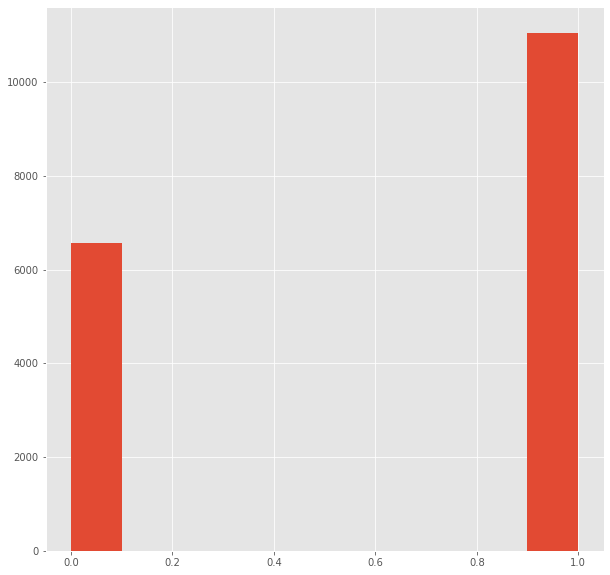

In [253]:
#Showing the percentage of the responses
print((readmittion_test['readmitted'].value_counts())/readmittion_test['readmitted'].size)

readmittion_test['readmitted'].hist(figsize = (10,10))
plt.show()
#over 62% person were readmitted while less tha 39% were not readmitted. 

In [254]:
readmittion_test.groupby('readmitted').mean()
#the average number of medications taken by someone who was admitted is 14.801811	 ........

num_medications  number_outpatient  number_emergency  \
readmitted                                                         
0                 15.697834           0.199969          0.176785   
1                 14.801811           0.114350          0.088909   

            time_in_hospital  number_inpatient  encounter_id        age  \
readmitted                                                                
0                   4.237950          0.318334  1.728057e+08  67.593045   
1                   3.904572          0.139611  1.829883e+08  65.133997   

            num_lab_procedures  number_diagnoses  num_procedures  
readmitted                                                        
0                    40.669005          7.446614        1.477120  
1                    41.093255          6.815301        1.476596

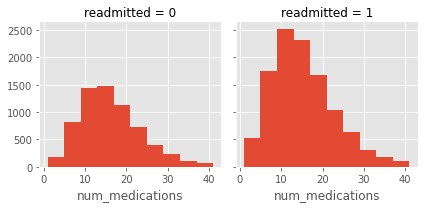

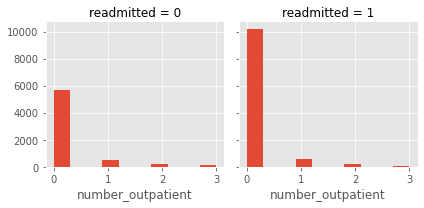

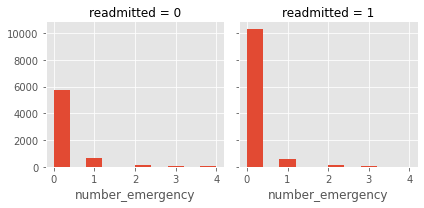

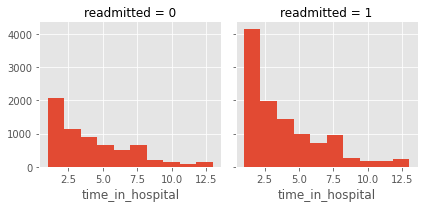

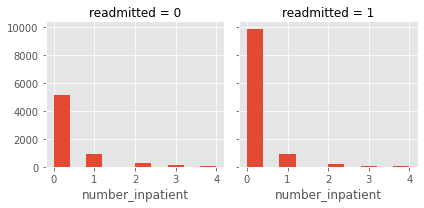

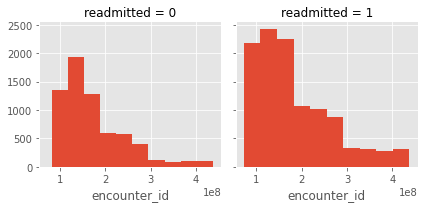

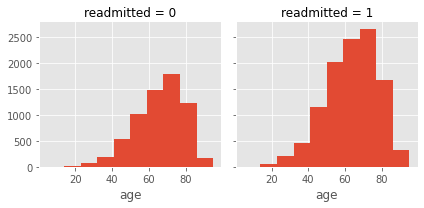

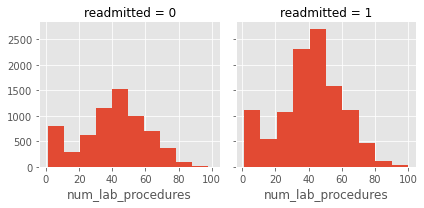

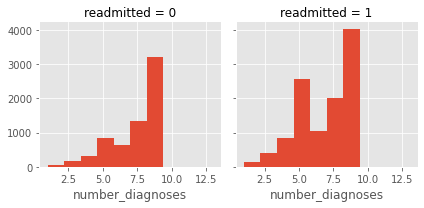

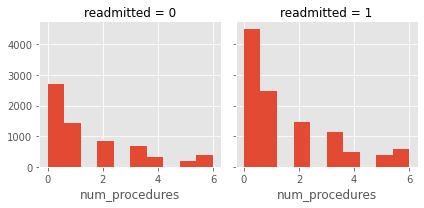

In [255]:
def readmitted_hist(df, plots_var, grid_cols): 
  for x in plots_var:
    plot = sns.FacetGrid(df, col = grid_cols, margin_titles = True)
    plot.map(plt.hist, x)
    plt.show()

readmitted_hist(readmittion_test, indp_col, 'readmitted')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


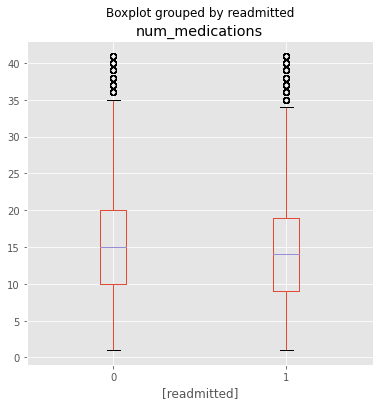

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


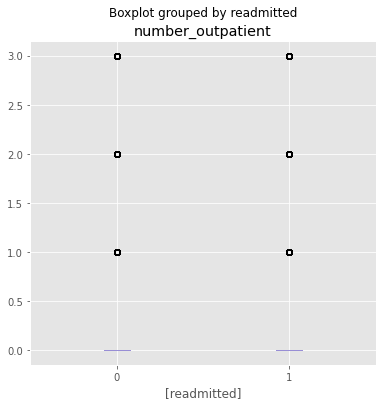

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


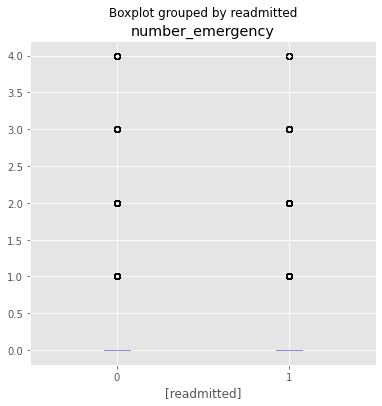

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


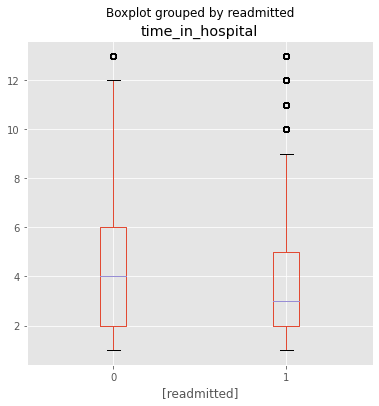

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


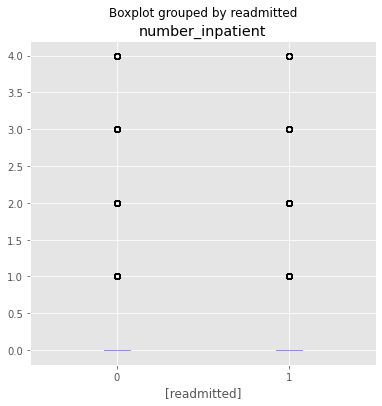

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


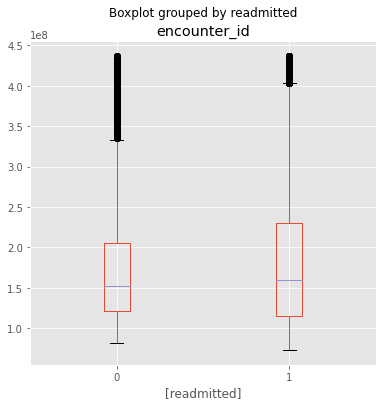

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


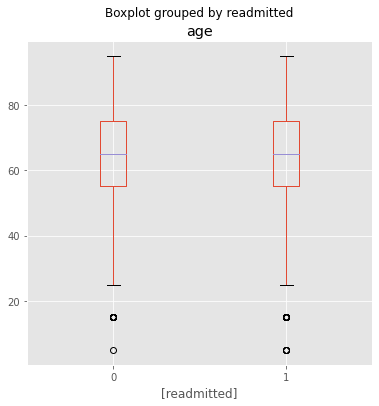

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


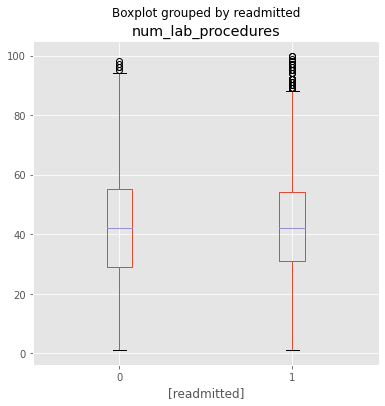

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


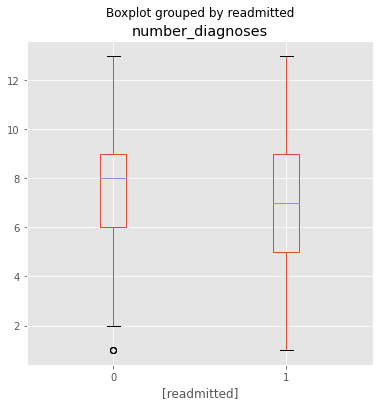

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


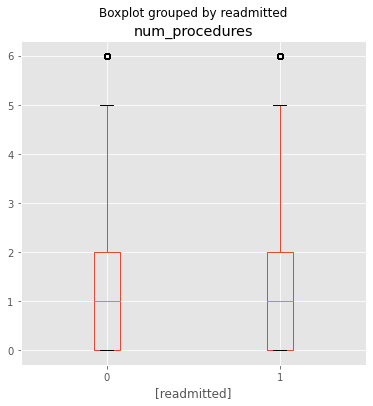

'Done'

In [272]:
def readmittion_boxplot(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        fig = plt.figure(figsize=(6, 6))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column=[col], ax=ax, by=['readmitted'])
        plt.show()
    return('Done')
readmittion_boxplot(readmittion_test)

From the result of the boxplot, only variables [number_of_inpatient, number_of_emergency, number_of_outpatient] seems to have no effect on the readmittion of patients and this sounds logical. The histogram also gives similar result. 

In [257]:
readmittion_test.head()

num_medications  number_outpatient  number_emergency  time_in_hospital  \
20737               11                  0                 0                 3   
20824                9                  0                 0                 4   
21083               18                  0                 0                10   
23879               19                  0                 0                12   
23922               10                  0                 0                12   

       number_inpatient  encounter_id  age  num_lab_procedures  \
20737                 0      72848634   65                  59   
20824                 0      73062156   95                  56   
21083                 0      73731852   75                  68   
23879                 0      81355914   75                  77   
23922                 0      81458964   75                  60   

       number_diagnoses  num_procedures readmitted  
20737                 6               3          1  
20824                 6               1          1  
21083                 6               1          1  
23879                 5               5          1  
23922                 5               5          1

In [258]:
X = readmittion_test.select_dtypes(include=[np.number]).copy()
scaler = StandardScaler()

X0 = scaler.fit_transform(X)
X0 =  pd.DataFrame(X0, index=X.index, columns=X.columns)
Y0 = readmittion_test['readmitted'].astype('int')


In [259]:
import statsmodels.api as sm
logit_model=sm.Logit(Y0,X0)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.660414
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                17601
Model:                          Logit   Df Residuals:                    17591
Method:                           MLE   Df Model:                            9
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:              -0.0002311
Time:                        12:18:44   Log-Likelihood:                -11624.
converged:                       True   LL-Null:                       -11621.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
num_medications       -0.0313      0.018     -1.692      0.091      -0.067       0.005
numbe

The result from the p-values shows that most of variable are significant in the model. 

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X0, Y0, test_size = 0.3)
lg = linear_model.LogisticRegression()
lg.fit(X_train, Y_train)

print("Score from training data: {}".format(lg.score(X_train, Y_train)))
print("Score from test data: {}".format(lg.score(X_test, Y_test)))
print("Intercept:\n {}".format(lg.intercept_))
print("Coefficients:\n")
for feat, coef in zip(X, lg.coef_[0]):
    print(" {:>20}: {}".format(feat, coef))



Score from training data: 0.6533279220779221
Score from test data: 0.652338572240106
Intercept:
 [0.54870752]
Coefficients:

      num_medications: -0.041884118967005564
    number_outpatient: -0.11961876277806725
     number_emergency: -0.15978466986921264
     time_in_hospital: -0.023653721738963195
     number_inpatient: -0.24972873687559907
         encounter_id: 0.2832097740048433
                  age: -0.09256664511910992
   num_lab_procedures: 0.11192769579078915
     number_diagnoses: -0.3464481236893211
       num_procedures: 0.004017249380010669


In [261]:
y_pred = lg.predict(X_test)
print(y_pred)

[1 0 1 ... 1 1 1]


In [262]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[ 430 1530]
 [ 306 3015]]


The result shows that 420 and 3017 were correctly predicted while 271 and 1573 were wrongly predicted.

In [263]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.22      0.32      1960
           1       0.66      0.91      0.77      3321

    accuracy                           0.65      5281
   macro avg       0.62      0.56      0.54      5281
weighted avg       0.63      0.65      0.60      5281



In [264]:
#Chose 7 becuase the boxplot shows me 7 variables have impact on the readmittio
selected = feature_selection.RFE(lg, n_features_to_select=7, verbose=0, step=1)
selected = selected.fit(X0, Y0)
r_features = X0.loc[:, selected.support_]
print("R features are:\n{}".format(','.join(list(r_features))))

R features are:
number_outpatient,number_emergency,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses


In [265]:
X0.loc[:, selected.support_]

number_outpatient  number_emergency  number_inpatient  encounter_id  \
20737           -0.296233         -0.281756         -0.358655     -1.334379   
20824           -0.296233         -0.281756         -0.358655     -1.331699   
21083           -0.296233         -0.281756         -0.358655     -1.323297   
23879           -0.296233         -0.281756         -0.358655     -1.227634   
23922           -0.296233         -0.281756         -0.358655     -1.226341   
...                   ...               ...               ...           ...   
101249          -0.296233         -0.281756         -0.358655      3.232094   
101268          -0.296233         -0.281756         -0.358655      3.238179   
101278           1.729404         -0.281756         -0.358655      3.238665   
101284          -0.296233         -0.281756          1.380858      3.238943   
101286          -0.296233         -0.281756          1.380858      3.238944   

             age  num_lab_procedures  number_diagnoses  
20737  -0.067323            0.920829         -0.524886  
20824   1.856289            0.767908         -0.524886  
21083   0.573881            1.379593         -0.524886  
23879   0.573881            1.838357         -1.024562  
23922   0.573881            0.971803         -1.024562  
...          ...                 ...               ...  
101249  0.573881            0.920829          0.974143  
101268 -0.067323            0.614987          0.974143  
101278 -0.067323            0.665960         -2.523592  
101284  1.215085           -2.035649          0.974143  
101286  1.215085            0.003302         -0.524886  

[17601 rows x 7 columns]

In [266]:
X2 = r_features
Y = Y0
trainX, testX, trainY, testY = train_test_split(X2, Y, test_size=0.3, random_state=0)
lg2 = linear_model.LogisticRegression()
lg2.fit(trainX, trainY)
print("Score from training data: {}".format(lg2.score(trainX, trainY)))
print("Score from test data: {}".format(lg2.score(testX, testY)))
print("Intercept:\n {}".format(lg2.intercept_))
print("Coefficients:\n")
for feat2, coef2 in zip(X2, lg2.coef_[0]):
    print(" {:>20}: {}".format(feat2, coef2))


Score from training data: 0.6545454545454545
Score from test data: 0.6423025942056428
Intercept:
 [0.57466298]
Coefficients:

    number_outpatient: -0.12098473885314365
     number_emergency: -0.14254395929445526
     number_inpatient: -0.2508948186851266
         encounter_id: 0.27837064804630135
                  age: -0.1232850852563386
   num_lab_procedures: 0.08222321393052917
     number_diagnoses: -0.36301102621900444


In [267]:
predicted = lg2.predict(testX)
print("Mean hits: {}".format(np.mean(predicted==testY)))

Mean hits: 0.6423025942056428


In [268]:
scores = cross_val_score(linear_model.LogisticRegression(), X2, Y, scoring='accuracy', cv=8)
scores
print("Mean scores: {}".format(scores.mean()))

Mean scores: 0.6483706011730205


In [269]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(testY, predicted)
print(confusion_matrix2)

[[ 422 1617]
 [ 272 2970]]


AUC = 0.6511355223360389


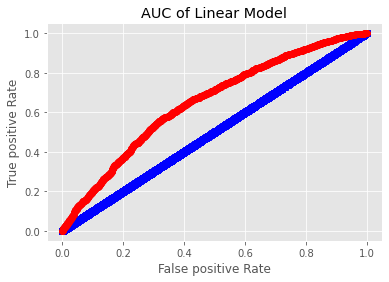

In [270]:
prob = np.array(lg2.predict_proba(testX)[:, 1])
testY += 1
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))
plt.scatter(fpr, fpr, c='b', marker='s')
plt.scatter(fpr, sensitivity, c='r', marker='o')
plt.title('AUC of Linear Model')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

In [273]:
# ded
#def classify_for_threshold(clf, testX, testY, t):
    #prob_df = pd.DataFrame(clf.predict_proba(testX)[:, 1])
    #prob_df['predict'] = np.where(prob_df[0]>=t, 1, 0)
    #prob_df['actual'] = testY
   #return pd.crosstab(prob_df['actual'], prob_df['predict'])
#for t in [0.2, 0.3, 0.5, 0.1, 0.01, 0.08]:
    #crosstab = classify_for_threshold(clf, testX, testY, t)
    #print("Threshold {}:\n{}\n".format(t, crosstab))